In [2]:
from tensorflow.keras.datasets import imdb

In [3]:
(train_input, train_target), (test_input, test_target)= imdb.load_data(num_words=500)

print(train_input.shape, test_input.shape)
print(len(train_input[0]))
print(len(train_input[1]))
print(train_input[0])
print(train_target[:20])

17473536/17464789 [==============================] - 0s 0us/step
(25000,) (25000,)
218
189
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [4]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [5]:
import numpy as np

lengths = np.array([len(x) for x in train_input])

print(np.mean(lengths), np.median(lengths))



239.00925 178.0


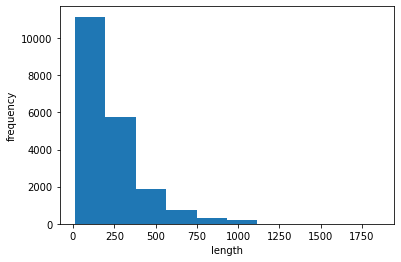

In [6]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)

print(train_seq.shape)
print(train_seq[0])
print(train_input[0][-10:])
print(train_seq[5])

val_seq = pad_sequences(val_input, maxlen=100)

(20000, 100)
[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]
[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]
[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [11]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

train_oh = keras.utils.to_categorical(train_seq)

print(train_oh.shape)
print(train_oh[0][0][:12])
print(np.sum(train_oh[0][0]))

val_oh = keras.utils.to_categorical(val_seq)

model.summary()

(20000, 100, 500)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1.0
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [12]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100
313/313 [==============================] - 20s 58ms/step - loss: 0.7043 - accuracy: 0.4975 - val_loss: 0.6980 - val_accuracy: 0.5112
Epoch 2/100
313/313 [==============================] - 23s 72ms/step - loss: 0.6961 - accuracy: 0.5131 - val_loss: 0.6929 - val_accuracy: 0.5254
Epoch 3/100
313/313 [==============================] - 22s 70ms/step - loss: 0.6859 - accuracy: 0.5500 - val_loss: 0.6781 - val_accuracy: 0.5784
Epoch 4/100
313/313 [==============================] - 20s 63ms/step - loss: 0.6601 - accuracy: 0.6213 - val_loss: 0.6528 - val_accuracy: 0.6356
Epoch 5/100
313/313 [==============================] - 19s 60ms/step - loss: 0.6375 - accuracy: 0.6663 - val_loss: 0.6318 - val_accuracy: 0.6652
Epoch 6/100
313/313 [==============================] - 16s 50ms/step - loss: 0.6150 - accuracy: 0.6914 - val_loss: 0.6107 - val_accuracy: 0.6914
Epoch 7/100
313/313 [==============================] - 23s 72ms/step - loss: 0.5939 - accuracy: 0.7166 - val_loss: 0.5898 - val_ac

NameError: ignored

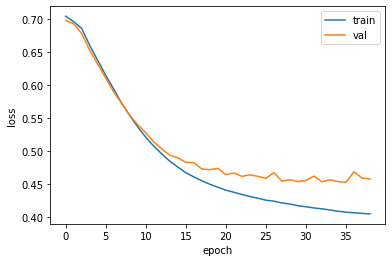

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [14]:
mode12 = keras.Sequential()

mode12.add(keras.layers.Embedding(500, 16, input_length=100))
mode12.add(keras.layers.SimpleRNN(8))
mode12.add(keras.layers.Dense(1, activation='sigmoid'))

mode12.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [17]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
mode12.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best=embedding=model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = mode12.fit(train_seq, train_target, epochs=100, batch_size=64, 
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 24ms/step - loss: 0.6793 - accuracy: 0.5724 - val_loss: 0.6538 - val_accuracy: 0.6532
Epoch 2/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6379 - accuracy: 0.6840 - val_loss: 0.6251 - val_accuracy: 0.7044
Epoch 3/100
313/313 [==============================] - 9s 27ms/step - loss: 0.6124 - accuracy: 0.7183 - val_loss: 0.6040 - val_accuracy: 0.7260
Epoch 4/100
313/313 [==============================] - 7s 23ms/step - loss: 0.5906 - accuracy: 0.7387 - val_loss: 0.5855 - val_accuracy: 0.7392
Epoch 5/100
313/313 [==============================] - 7s 23ms/step - loss: 0.5709 - accuracy: 0.7541 - val_loss: 0.5666 - val_accuracy: 0.7488
Epoch 6/100
313/313 [==============================] - 7s 23ms/step - loss: 0.5515 - accuracy: 0.7674 - val_loss: 0.5490 - val_accuracy: 0.7656
Epoch 7/100
313/313 [==============================] - 7s 23ms/step - loss: 0.5342 - accuracy: 0.7731 - val_loss: 0.5355 - val_accuracy:

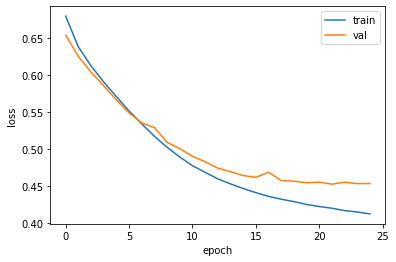

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [20]:
model_lstm = keras.Sequential()

model_lstm.add(keras.layers.Embedding(500, 16, input_length=100))
model_lstm.add(keras.layers.SimpleRNN(8))
model_lstm.add(keras.layers.Dense(1, activation='sigmoid'))

model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [22]:

model_lstm.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

history = model_lstm.fit(train_seq, train_target, epochs=100, batch_size=64, 
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 24ms/step - loss: 0.6803 - accuracy: 0.5638 - val_loss: 0.6523 - val_accuracy: 0.6466
Epoch 2/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6287 - accuracy: 0.6920 - val_loss: 0.6137 - val_accuracy: 0.7128
Epoch 3/100
313/313 [==============================] - 8s 27ms/step - loss: 0.5964 - accuracy: 0.7294 - val_loss: 0.5914 - val_accuracy: 0.7296
Epoch 4/100
313/313 [==============================] - 7s 23ms/step - loss: 0.5733 - accuracy: 0.7482 - val_loss: 0.5728 - val_accuracy: 0.7440
Epoch 5/100
313/313 [==============================] - 7s 23ms/step - loss: 0.5544 - accuracy: 0.7613 - val_loss: 0.5552 - val_accuracy: 0.7494
Epoch 6/100
313/313 [==============================] - 7s 23ms/step - loss: 0.5380 - accuracy: 0.7700 - val_loss: 0.5406 - val_accuracy: 0.7624
Epoch 7/100
313/313 [==============================] - 7s 23ms/step - loss: 0.5250 - accuracy: 0.7740 - val_loss: 0.5324 - val_accuracy: